# **Decision Tree and Random Forest for Specialty Coffee**
by [Sonjoy Das, PhD](https://www.linkedin.com/in/sonjoy-das-9b323213/)

In this work, we will use customer data of a specialty coffee company and provide recommendation to the management with data-driven justification for critically important business decisions. 

We will use scikit-learn to build four different decision tree models — two using *entropy* and two using *gini impurity* — to ascertain whether a potentially business-transforming deal with a particular coffee farm in China will take the company business to the next level. 

The work involves the full data science pipeline, from importing, loading and cleaning the data right through to modeling and concluding. Here, the decision trees will properly implement the **supervised learning method of classification**, and we will enforce the best practices of:

* making an appropriate train/test split
* one-hot encoding
* model evaluation
* restricting the maximum depth of the tree
* using random forest to increase predictive accuracy and control overfitting

# 0. The Scenario

A start-up *Speciality Coffee Company* sells two types of thing:
- specialty coffee beans, in bulk (by the kilogram only) 
- coffee equipment and merchandise (grinders, brewing equipment, mugs, books, t-shirts).

The Speciality Coffee Company has three stores, two in Europe and one in the USA. The flagship store is in the USA, and everything is quality assessed there, before being shipped out. The customers of the Coffee Company further away from the USA flagship store have higher shipping charges. 

The Coffee Company are turning towards using data science and machine learning to systematically make decisions about which coffee farmers they should strike deals with. 

The company typically buys coffee from farmers, processes it on site, brings it back to the USA, roasts it, packages it, markets it, and ships it (only in bulk after quality assurance) to customers internationally. The customers all own coffee shops in major cities like New York, Paris, London, Hong Kong, Tokyo, and Berlin. 

Now, the Speciality Coffee Company has a decision to make about whether to strike a deal with a coffee farm (let's mask it as the *Hidden Farm*) in rural China. This farm is legendary in certain parts of the world but not yet gained any footprints in USA and Europe.

It can be a risky decision for our Speciality Coffee Company, as the deal will be expensive, and the Hidden Farm coffee might not be bought by the US and European customers. The stakes are high and times are tough for our Speciality Coffee Company because it is a start-up business. Their stocks are not as good as they expected it to be. Farmers are also prefering larger enterprises relative to the start-up businesses. But, the publicity of selling *Hidden Farm* coffee, which is quite unique compared to the other existing speciality cofees available in the US and European market, could save our Speciality Coffee Company and help to stay in business. 

To help the Cofee Company in making an informed and data-driven decision, we will ***build a decision tree to predict how many units of the Hidden Farm Chinese coffee will be purchased by the company's most loyal customers.*** 

To this end, a survey of 702 of the most loyal cofee customers has been conducted and the follloiwng data are collected about customers:
- age
- gender 
- salary 
- whether they have bought at least one product of the Speciality Coffee Company online
- their distance from the flagship store in the USA (standardized to a number between 0 and 11) 
- how much they spent on the Speciality Coffee products on the week of the survey 
- how much they spent on the Speciality Coffee products in the month preeding the survey
- the number of Speciality Coffee bean shipments each customer has ordered over the preceding year. 

Each customer, who participated in the survey, was also asked whether they would buy the *Hidden Farm* coffee, and some (but not all) of the customers gave responses to that question. 

Having the scenario above, let's think for a while before moving forward. **If more than 70% of the surveyed customers are likely to buy the Hidden Farm coffee, then we can recommend our client (the start-up Speciality Coffee Company) to strike the deal** with the Chinese Hidden Farm farmers and sell the coffee in the US and European market. If the number is less than 70%, then we would recommend to not strike the deal. There's, of course, some doubt whether 70% is a reasonable threshold or not, but it'll do for the moment (and we can revise this threshold later). 

To solve the problem and help our client, we will build a decision tree to implement a classification solution. 

-------------------------------
Here is the table of contents covered in this notebook:

## Table of Contents
* [0. The Scenario](#0.-The-Scenario)
* [1. Overview](#1.-Overview)
* [2. Libraries and Data](#2.-Libraries-and-Data)
    * [2a. Import Packages](#2a.-Import-Packages)
    * [2b. Load Data](#2b.-Load-Data)
    * [2c. Explore the Data](#2c.-Explore-the-Data)
* [3. Cleaning, Transforming and Visualizing](#3.-Cleaning,-Transforming-and-Visualizing)
    * [3a. Cleaning & Exploring Data](#3a.-Cleaning-&-Exploring-Data)
    * [3b. Visualizing Data](#3b.-Visualizing-Data)
    * [3c. Transforming Data to Train/Test Split](#3c.-Transforming-Data-to-Train/Test-Split)
        * [(a) Drop all `No Response` values in the `Decision` column, and save the result as `NoPrediction`](#(a)-Drop-all-No-Response-values-in-the-Decision-column,-and-save-the-result-as-NoPrediction)
        * [(b) Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis](#(b)-Visualize-the-data-using-scatter-and-boxplots-of-several-variables-in-the-y-axis-and-the-decision-on-the-x-axis)
        * [(c) Get the subset of coffee data with `No Response` values in the `Decision` column, and save that subset as `Prediction`](#(c)-Get-the-subset-of-coffee-data-with-No-Response-values-in-the-Decision-column,-and-save-that-subset-as-Prediction)
        * [(d) Create dummy variables to deal with categorical inputs](#(d)-Create-dummy-variables-to-deal-with-categorical-inputs)
        * [(e) Divide the `NOPrediction_dummies` subset into `X` and `y`](#(e)-Divide-the-NOPrediction_dummies-subset-into-X-and-y)
        * [(f) Further divide those subsets into train and test subsets for `X` and `y`, respectively,: `X_train`, `X_test`, and `y_train`, `y_test`](#(f)-Further-divide-those-subsets-into-train-and-test-subsets-for-X-and-y,-respectively,:-X_train,-X_test,-and-y_train,-y_test)
    
* [4. Modelling](#4.-Modelling)
    * [4a. Model 1: Entropy model - no `max_depth`](#4a.-Model-1:-Entropy-model---no-max_depth)
        * [(a) Building the model](#(a)-Building-the-model)
        * [(b) Interpretation and evaluation](#(b)-Interpretation-and-evaluation)
    * [4b. Model 2: Gini impurity model - no `max_depth`](#4b.-Model-2:-Gini-impurity-model---no-max_depth)
    * [4c. Model 3: Entropy model - `max_depth = 3`](#4c.-Model-3:-Entropy-model---max_depth-=-3)
    * [4d. Model 4: Gini impurity model - `max_depth = 3`](#4d.-Model-4:-Gini-impurity-model---max_depth-=-3)
* [5. Evaluation and Conclusion](#5.-Evaluation-and-Conclusion)
    * [5a. How many customers will buy Hidden Farm coffee?](#5a.-How-many-customers-will-buy-Hidden-Farm-coffee?)
    * [5b. Decision](#5b.-Decision)
* [6. Random Forest](#6.-Random-Forest)
    * [6a. Import additional modules](#6a.-Import-additional-modules)
    * [6b. Building Model](#6b.-Building-Model)
    * [6c. Revised Conclusion](#6c.-Revised-Conclusion)

# 1. Overview

We will use decision trees to determine whether the factors of salary, gender, age, how much money the customer spent last week and during the preceding month on Speciality Coffee products, how many kilogram coffee bags the customer bought over the last year, whether they have bought at least one cofee product online, and their distance from the USA flagship store, could predict whether customers would purchase the Hidden Farm coffee if a deal with Chinese Farm were struck. 

# 2. Libraries and Data

In [1]:
# Print the Python version being used
from platform import python_version
print(python_version())

3.10.4


## 2a. Import Packages

In [2]:
import re
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
# from io import StringIO  
# from IPython.display import Image  
# import pydotplus
#
from sklearn.tree import export_text
import graphviz 
#
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#
from sklearn.cluster import KMeans # For plotting Kmeans center in visualization of data

## 2b. Load Data 

In [3]:
# Read in the data to a variable called `coffeeData_df`
coffeeData_df = pd.read_csv('./data/SpecialityCompanyCoffeeData.csv')

## 2c. Explore the Data

As we've seen, exploration entails doing things like checking out the **initial appearance** of the data with `.head()` or `.tail()`, the **dimensions** of our data with `.shape`, the **data types** of the variables with `.info()`, the **number of non-null values**, how much **memory** is being used to store the data, and finally the major summary statistcs capturing **central tendancy, dispersion and the null-excluding shape of the dataset's distribution**. 

Let's do all these below.

In [4]:
# Call .head() on our data 
coffeeData_df.tail(10)

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
692,23,Female,5,38,135,57822,9.517477,0,0.0
693,32,Male,5,44,174,45644,9.636764,0,1.0
694,28,Male,5,36,133,43674,10.201432,1,0.0
695,55,Male,5,39,114,53585,10.355656,1,0.0
696,29,Female,5,20,74,29799,10.455068,0,0.0
697,45,Female,5,61,201,80260,10.476341,0,1.0
698,54,Male,5,44,116,44077,10.693889,1,0.0
699,63,Male,5,33,117,43081,10.755194,1,0.0
700,20,Female,5,41,159,12522,10.871566,0,NaN
701,90,Male,5,39,170,15098,10.891566,0,1.0


Ok, we see that there are some missing values. Also recall that the `Distance` variable represents a standardized value of distance between 0 and 11.

In [5]:
# Let's check how many features and rows (records or samples) we have
print('The data have ', coffeeData_df.shape[0], ' rows and ', coffeeData_df.shape[1], ' columns\n')
print('Column names:\n')
print('\n'.join(list(coffeeData_df.columns))+'\n')

The data have  702  rows and  9  columns

Column names:

Age
Gender
num_coffeeBags_per_year
spent_week
spent_month
SlrAY
Distance
Online
Decision



In [6]:
# Call .info() on our data
coffeeData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_week               702 non-null    int64  
 4   spent_month              702 non-null    int64  
 5   SlrAY                    702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.5+ KB


The `Decision` variable has significant amount missing values, while no other variables have missing values. The `Decision` variable records the response of each customer whether they would buy the *Hidden Farm* coffee or not. Let's check it by using `DataFrame.isnull().sum()` method. The `DataFrame.isnull()` detects any missing values. See details [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html).

In [7]:
coffeeData_df.isnull().sum()

Age                          0
Gender                       0
num_coffeeBags_per_year      0
spent_week                   0
spent_month                  0
SlrAY                        0
Distance                     0
Online                       0
Decision                   228
dtype: int64

A total of 228 values of `Decision` out of 702 samples is missing (i.e., no customer response on the question if they would buy the *Hidden Farm* coffee). No other columns have any missing values.

Let us use `describe()` [function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) to generate descriptive statistics of each numerical columns of the dataframe. Since our `coffeeData_df` dataframe has mixed data types, the default is to return only an analysis of numeric columns. See documentation (ref: [pandas.DataFrame.describe](pandas.DataFrame.describe)).

In [8]:
# Call describe() on your data to get the relevant summary statistics for your data 
coffeeData_df.describe()

,Age,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,474.000000
mean,34.243590,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339,0.639241
std,13.927945,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373,0.480728
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,23.000000,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000,0.000000
50%,28.000000,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000,1.000000
75%,46.000000,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000,1.000000
max,90.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000,1.000000


# 3. Cleaning, Transforming and Visualizing
## 3a. Cleaning & Exploring Data

We will do the folliwng tasks in this section:

+ change the column names to words which maximize readability and clarity

+ clean up the values of the `Gender` column

+ replace `1.0` and `0.0` in the `Decision` column by `YES` and `NO`, respectively (recall that this column has many missing values indicating no response from the customer)

We have already checked names of our data's columns in the previous [Section](#2c.-Explore-the-Data). Let's start with by changing the name of `num_coffeeBags_per_year`, `spent_week`, `spent_month`, and `SlrAY` to `coffeeBags_per_year`, `spent_last_week`, `spent_last_month`, and `salary`, respectively, by using `.rename()` [function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html).

In [9]:
# Make the relevant name changes
coffeeData_df.rename(columns = {"num_coffeeBags_per_year":"coffeeBags_per_year", "spent_month":"spent_last_month", "spent_week":"spent_last_week",
                             "SlrAY":"Salary"}, inplace = True)

In [10]:
# Check out the column names
print('Column names:\n')
print('\n'.join(list(coffeeData_df.columns))+'\n')

Column names:

Age
Gender
coffeeBags_per_year
spent_last_week
spent_last_month
Salary
Distance
Online
Decision



Let's now clean up the values of the `Gender` column. This column was excluded from the output of `.describe()` function analysis earlier because this column was a not a numerical column. Let's have a closer look of this feature now by exlusively specifying the `Gender` column through `.describe()` function.

In [11]:
# Call describe() on the gender column 
coffeeData_df["Gender"].describe()

count      702
unique       9
top       Male
freq       355
Name: Gender, dtype: object

Clearly, this column needs some cleaning because it has 9 unique values. The `top` is the most common value (in this case, it's `Male`) of the `Gender` column. The `freq` is the most common value’s frequency.

We can find out the unique values and their counts using `pandas`' `.value_counts()` [function](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html).

In [12]:
# See the `Gender` column's unique values 
unique_value_counts = coffeeData_df["Gender"].value_counts()
print(unique_value_counts)

Male      355
Female    340
female      1
F           1
f           1
FEMALE      1
MALE        1
male        1
M           1
Name: Gender, dtype: int64


Ok. It's not bad. It's simply a bunch of inconsistencies because of alternative word forms of `Female` and `Male`. Let's count how many responses from female and male participants are there.

In [13]:
female_counts = 0
male_counts = 0

for i in range(len(coffeeData_df["Gender"].value_counts())):
    word = coffeeData_df["Gender"].value_counts().index[i]
    # print(f'{word}: {unique_value_counts[i]}')
    if word[0]=='f' or word[0]=='F':
        female_counts = female_counts + unique_value_counts[i]
    elif word[0]=='m' or word[0]=='M':
        male_counts = male_counts + unique_value_counts[i]

print(f'\nMale: {male_counts}')
print(f'Female: {female_counts}\n')


Male: 358
Female: 344



Let's now use `.replace()` [function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to make the values of the `Gender` column to just `Female` and `Male`. We will use Python's [regular expression operations](https://docs.python.org/3/library/re.html), i.e., "regex" to assign value for the `to_replace` parameter of the `.replace()` function.

In [14]:
# Replace all alternate values for the Female entry with 'Female'
coffeeData_df["Gender"] = coffeeData_df["Gender"].replace(to_replace=r'^[fF].*', value='Female', regex=True)

Let's check if it did the job as we expected by using `pandas`' `.unique()` function for series (re: [pandas.Series.unique](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html)).

In [15]:
# Check out the unique values for the 'Gender' column
coffeeData_df["Gender"].unique()

array(['Female', 'Male', 'MALE', 'male', 'M'], dtype=object)

Yes, it looks fine. All the alternatives of "female" have been replaced by `Female`. Let's do the same thing for "male" now.

In [16]:
# Replace all alternate values with "Male"
coffeeData_df["Gender"] = coffeeData_df["Gender"].replace(to_replace=r'^[mM].*', value='Male', regex=True)

In [17]:
# Let's check the value counts of the column "Gender"
coffeeData_df["Gender"].value_counts()

Male      358
Female    344
Name: Gender, dtype: int64

Great! The `Gender` column now have consistent values of `Female` and `Male`. The value counts also match with the counts that we checked earlier using a `for` loop.

Next, let's consider the feature `Online` that responds to a question if a customer bought at least one product of the Speciality Coffee Company **online** or not. Thus, this the interger-valued responses `1` and `0` actually represent `Yes` and `No`, and therefore, should be converted into categorical variable for clarity. We will use

In [18]:
coffeeData_df['Online'] = coffeeData_df.Online.astype('category')
print(f"\nData type of 'Online' feature: {coffeeData_df.Online.dtypes}\n")
Online_value_counts = coffeeData_df["Online"].value_counts()
print(f"\nValue counts of 'Online' feature:\n{Online_value_counts}\n")


Data type of 'Online' feature: category


Value counts of 'Online' feature:
1    373
0    329
Name: Online, dtype: int64



Ok, the `Online` feature is now turned into `category` datatype and also see distribution of the customers who purchased *at least one online product* vs whio did *not*.

Let's now turn our attention to the `Decision` column. This column has values like `1.0`, `0.0` and `NaN` (indicating no response from the customer). We can verify the unique values by using `.unique()` function on the `Decision` column.

In [19]:
# Check out the unique values of the column 'Decision'
coffeeData_df["Decision"].unique() 

array([ 1., nan,  0.])

We now want to replace `1.0` and `0.0` in the `Decision` column by `YES` and `NO`, respectively.

In [20]:
# Replace 1.0 and 0.0 by 'Yes' and 'No'
coffeeData_df["Decision"] = coffeeData_df["Decision"].replace(to_replace=1.0, value='YES')
coffeeData_df["Decision"] = coffeeData_df["Decision"].replace(to_replace=0.0, value='N')

In [21]:
# Check that our replacing those values with 'YES' and 'NO' worked, with .unique() function
coffeeData_df["Decision"].unique()

array(['YES', nan, 'N'], dtype=object)

In [22]:
# Also check the value counts
coffeeData_df["Decision"].value_counts()

YES    303
N      171
Name: Decision, dtype: int64

Now, replace all `NaN` by a string called `No Response` using `pandas`' `.fillna()` method (re:[pandas.DataFrame.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)). We are doing this for better clarifty of the `Decision` variable.

In [23]:
coffeeData_df.Decision = coffeeData_df.Decision.fillna('No Response')

# Let's now do a value counts of `Decision` column
coffeeData_df["Decision"].value_counts()

YES            303
No Response    228
N              171
Name: Decision, dtype: int64

**We cannot really say much about the non-responsive customers whether they are likely to buy the new coffee or not**.

**Let's explore a bit more to get some insight into this matter**.

To start with, we will use `.describe()` function and pass the argument `include='all'`. If a dataframe has mixed data types, the default option (i.e., without `include='all'`), the output will only include an analysis of numeric columns. If the dataframe consists only of object and categorical data without any numeric columns, the default option is to return an analysis of both the object and categorical columns. Since our dataframe `coffeeData_df` has mixed data types, we are passing `include='all'` so that the result will include a union of attributes of each type.

In [24]:
coffeeData_df.describe(include='all')

,Age,Gender,coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online,Decision
count,702.000000,702,702.000000,702.000000,702.000000,702.000000,702.000000,702.0,702
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,2.0,3
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,1.0,YES
freq,NaN,358,NaN,NaN,NaN,NaN,NaN,373.0,303
mean,34.243590,NaN,2.710826,32.853276,107.923077,43819.843305,4.559186,NaN,NaN
std,13.927945,NaN,1.593629,15.731878,55.348485,26192.626943,3.116275,NaN,NaN
min,16.000000,NaN,0.000000,0.000000,0.000000,1617.000000,0.003168,NaN,NaN
25%,23.000000,NaN,1.000000,24.250000,62.000000,22812.250000,1.877812,NaN,NaN
50%,28.000000,NaN,3.000000,36.000000,113.500000,41975.000000,4.196167,NaN,NaN
75%,46.000000,NaN,4.000000,43.000000,150.750000,60223.000000,6.712022,NaN,NaN


This provides us a comprehensive summary statistics of both the numerical data and categorical columns. In particular, the informaiton about the `Gender` and `Decision` columns are a bit more meaningful now compared to the previous output of the `.describe()` function applied earlier on our `coffeeData_df` dataframe.

This, however, does not provide any information about any possible relationships between the `Decision` variable and other features. We need to see if we can find more information to that direction. Let us try to find some pattern by using `pandas`' `.groupby()` function for dataframe (re: [pandas.DataFrame.groupby
](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)).

In [25]:
coffeeData_df.groupby(['Decision', 'Gender'], axis=0).mean()

Age  coffeeBags_per_year  spent_last_week  \
Decision    Gender                                                    
N           Female  43.156250             2.239583        20.958333   
            Male    41.520000             2.306667        20.320000   
No Response Female  31.592233             2.932039        32.912621   
            Male    31.976000             2.984000        33.792000   
YES         Female  30.544828             2.841379        39.131034   
            Male    32.291139             2.708861        39.487342   

                    spent_last_month        Salary  Distance  
Decision    Gender                                            
N           Female         59.093750  31065.812500  7.232318  
            Male           61.800000  33871.946667  7.328082  
No Response Female        106.747573  39900.174757  3.610062  
            Male          113.424000  43591.160000  3.279506  
YES         Female        134.110345  51065.110345  3.731999  
            Male          131.867089  52378.240506  4.010919

The above line of code involving `.groupby()` splitted **each** numerical column first based on `Decision` variable (i.e., based on `N`, `No Response`, and `YES`). This yields 3 groups. Each of these 3 groups is then further splitted into 2 groups according to the `Gender` variable (i.e., per `Female` and `Male`). Then, the `.mean()` function is applied to each of these subgroups (a total of 6 subgroups) independently to produce the above results.

**<u>What do we observe from the above output?</u>**

+ [`Gender`]: *When contrasted between male and female*, there is no significant difference for any of the numerical columns in the groups given by `N`, `No Response`, and `YES`. But, it's based only on *average* value. So, we need to be a bit careful.

+ [`Age`]: The `YES` group has younger customers (*average* age of about 33) and `N` group has older customers (*average* age of about 43). The average age of the customers, who did not respond (`No Response` group), is about 32. It is highly possible that this group will eventually buy the new speciality coffee. But, of course, we have to be a bit careful.

+ [**Past Spending on Coffee**]: The `YES` group spent on *average* more on cofee bags last week or last month or last year [variables: `spent_last_week` (average `~ 39`), `spent_last_month` (average `≥ 130`), and `coffeeBags_per_year` (average around `2.7 to 2.8`), respectively]. The corresponding average of the `N` group is significantly low. On the other hand, the `No Response` group has *averages* for the `spent_last_week` (`~ 33 to 34`)  and `spent_last_month` (`~ 107 to 113`) that lie between the respective averages of the `YES` and `N` groups, but relatively more closer to the `YES` group. In terms of the `coffeeBags_per_year`, the `No Response` group interestingly has the highest value of average. 

+ [`Salary`]: The `YES` group has highest *average* salary (`≥ 50,000`) and `N` group has the lowest *average* salary (`≤ 34,000`). The salary of the `No Response` group falls between these two groups (`~ 40,000 to 44,0000`). In the previous point, we observed that the `No Response` group has, however, the highest average for `coffeeBags_per_year`. This possibly shows that the `No Response` group might be a loyal group of customers but they chose *not* to respond because of their own financial conditions.

+ Earlier we noted that the average age of `YES` group is about 33. Note that this group also has the *average* highest salary (`≥ 50,000`). The average age of the `N` group, on the other hand, is about 43 and they have *average* lowest salary (`≤ 34,000`).

+ [`Distance`]: The *average* of standardized `Distance` for the `YES` group is about 4.0, while the corresponding avarage value for the `N` group is 7.0. This average value for the `No Response` group is around 3.5, which is much closer to the `YES` group. 

In summary, we see that the `YES` group are younger customers, live closer to the US flagship store, have *average* highest salary, and spent well on the speciality coffee from our start-up Speciality Coffee Company in the last week, last month, and last year. The `N` group, on the other hand, are relatively older customers, live farther away from the US falgship store, have *average* lowest salary, and spent significantly less amount in the last week, last month, and last year. The `No Response` group are also younger customers like the `YES` group, live close to the US flagship store like the `YES` group, have salary less than `YES` group but more than the `N` group, did *not* spent as much as the `YES` group in the last week and last month but spent more than the `N` group. The `No Response` group, however, has spent highest in the last year. This essentially means that the `No Response` group is more closer to the `YES` group than the `N` group, and is perhaps more likely to purchase the new Chinese speciality coffee from our Speciality Coffee Company even if they did not respond.

[`Online`]: Note that the `Online` feature was not included in the output of the previous code block because we applied the `mean()` function (aggregate function) on the subgroups that resulted from the `groupby()` funciton. Since `Online` is a categorical feature (not numerical feature), the average operation (`mean()`) does not make any sense for categorical datatype. It will actually make sense if we consider the count operation on this categorical feature (and may provide us some relevant information). Let's see what we can find out for this feature.

In [26]:
coffeeData_df.groupby(['Decision', 'Gender'], axis=0).count()['Online'].to_frame()

Online
Decision    Gender        
N           Female      96
            Male        75
No Response Female     103
            Male       125
YES         Female     145
            Male       158

We see that the number of customers who bought *online at least one product* of the Speciality Coffee Company are significantly more in the `YES` group (`145 + 158 = 303`) than the `N` group (`96 + 75 = 171`). There is more than 75% customers in the `YES` group. The number of customers in the `No Response` group lies between these two groups (`103 + 125 = 208`). All these customers in the `No Response` group also bought *online* at least one product from our Coffee Company. However, based solely on this information, we cannot really say much about the `No Response` group.

In [27]:
# sns.set_context(context='notebook', font_scale=1)

# g = sns.PairGrid(coffeeData_df)
# g.map_upper(sns.scatterplot,color='m')
# g.map_lower(sns.kdeplot,color='g')
# g.map_diag(sns.histplot,fill=False)
# g.fig.set_size_inches(20,20)

In [28]:
# # Make a heatmap of the data
# plt.figure(figsize=(40,20))

# # https://indianaiproduction.com/seaborn-heatmap/
# ax = sns.heatmap(coffeeData_df.corr(), cmap="coolwarm", annot=True, annot_kws={"fontsize": 35})

# # https://moonbooks.org/Articles/How-to-increase-the-size-of-axes-labels-on-a-seaborn-heatmap-in-python-/
# # https://matplotlib.org/2.0.1/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html
# ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 30, rotation=45)
# ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 30, rotation=0)

# # https://stackoverflow.com/questions/37233108/seaborn-change-font-size-of-the-colorbar
# ax.collections[0].colorbar.ax.tick_params(labelsize=40);

## 3b. Visualizing Data

Now, it will be nicer if we can also visualize the above observations because it might be messy to understand the pattern if we focus too much on the "point" values (mean values) of our numerical features to see how they are related with the `Decision` variable. Let's group the numerical features according to their individual quartiles (or a range of values). This might provide more meaningful relations. For this, we will use `pandas`' `.qcut()` function (re: [pandas.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)).

**<u> Feature: `Age`</u>**

Let's start with `Age`. Add a column named `QuantileAge` to our dataframe that will show a range of age (technically, the [quantiles](https://en.wikipedia.org/wiki/Quantile)) to which age of the customer belong to.

In [29]:
coffeeData_df['QuantileAge'] = pd.qcut(coffeeData_df['Age'], q=5, precision=1)

In [30]:
coffeeData_df.head()

,Age,Gender,coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online,Decision,QuantileAge
0,36,Female,0,24,73,42789,0.003168,0,YES,"(33.0, 50.0]"
1,24,Male,0,44,164,74035,0.520906,0,No Response,"(23.0, 26.0]"
2,24,Male,0,39,119,30563,0.916005,1,YES,"(23.0, 26.0]"
3,20,Male,0,30,107,13166,0.932098,1,No Response,"(15.9, 23.0]"
4,24,Female,0,20,36,14244,0.965881,0,YES,"(23.0, 26.0]"


Now, use `pandas`' `.groupby()` function to create a multi-index series, `df`, that will contain counts of the customers of different groups (`YES` group, `No Response` group, and `N` group) in the quantiles of the `Age` variable. Change the variable name of this series, `df`, to `counts` by using `pandas`' series' `.rename()` function (re: [pandas.Series.rename](https://pandas.pydata.org/docs/reference/api/pandas.Series.rename.html)).

In [31]:
df = coffeeData_df.groupby(['QuantileAge', 'Decision'])['Age'].count().rename("counts")
print(df)

QuantileAge   Decision   
(15.9, 23.0]  N              12
              No Response    86
              YES            79
(23.0, 26.0]  N              15
              No Response    41
              YES            62
(26.0, 33.0]  N              35
              No Response    29
              YES            76
(33.0, 50.0]  N              46
              No Response    35
              YES            47
(50.0, 90.0]  N              63
              No Response    37
              YES            39
Name: counts, dtype: int64


Next, use to `pandas`' `.reset_index()` function (re: [pandas.DataFrame.reset_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)) to add all the hierarchical multi-index of the series `df` as new columns of a dataframe. A new sequential index is used for the dataframe. We assign this dataframe to the same variable `df` to save to our workspace. We will next use the dataframe `df` to create a box plot to verify our observation above about the relationship between `Age` and `Decision`.

In [32]:
df = df.reset_index()
df

,QuantileAge,Decision,counts
0,"(15.9, 23.0]",N,12
1,"(15.9, 23.0]",No Response,86
2,"(15.9, 23.0]",YES,79
3,"(23.0, 26.0]",N,15
4,"(23.0, 26.0]",No Response,41
5,"(23.0, 26.0]",YES,62
6,"(26.0, 33.0]",N,35
7,"(26.0, 33.0]",No Response,29
8,"(26.0, 33.0]",YES,76
9,"(33.0, 50.0]",N,46


Let's check what plot styles are available and we will use one of them to produce our bar plots. To understand, how we created the bar plot below, go through the materials in the `matplotlib`, `seaborn`, and `stackoverflow` whose links are provided in the Cell block below.

In [33]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


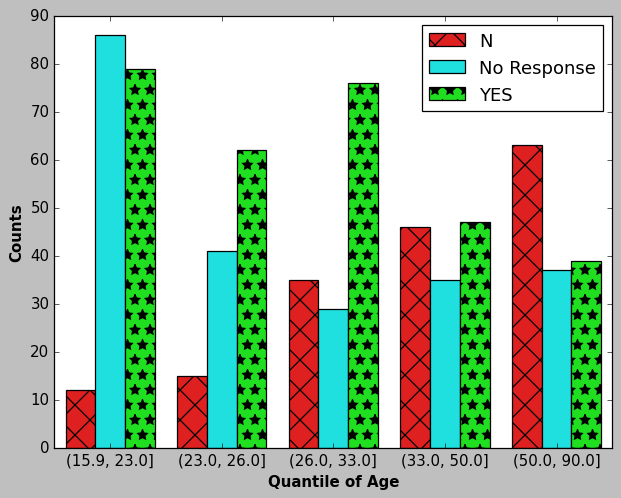

In [34]:
# Ref: https://matplotlib.org/stable/tutorials/introductory/customizing.html
plt.style.use('classic')

# Refer: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
fig, ax = plt.subplots(dpi=90)

# https://seaborn.pydata.org/generated/seaborn.barplot.html
# https://stackoverflow.com/questions/46173419/seaborn-change-color-according-to-hue-name
# List of colors: https://matplotlib.org/stable/gallery/color/named_colors.html
sns.barplot(x="QuantileAge", y="counts", hue="Decision", data=df, ax = ax, palette=["red", "cyan", "lime"])


# Add different hatch
# https://stackoverflow.com/questions/35467188/is-it-possible-to-add-hatches-to-each-individual-bar-in-seaborn-barplot
# https://matplotlib.org/stable/api/container_api.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html
# Define some hatches
hatches = ['x', '', '*']

# Loop over each container
for i,thiscontainer in enumerate(ax.containers):
    # Loop over each patch in 'thiscontainer'
    for thispatch in thiscontainer.patches:
        thispatch.set_hatch(hatches[i])


# Text size reference: https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text
# plt.xticks(rotation=30)
# plt.xticks(fontweight='bold')
ax.set_xlabel('Quantile of Age', fontweight='bold')
ax.set_ylabel('Counts', fontweight='bold')

ax.legend();

> Younger customers (`Age ≤ 33`) are more likely to try out the new speciality coffee from China, while older customers are unlikely to buy the new speciality coffee. This is consistent with our previous observation that we made.

We can now carry out the same procedure as above for the rest of the numerical features and verify that our previous observations under "**<u>What do we observe from the above output?</u>**" are consistent. To do this, let us write two custom functions to automate the above steps used for the feature variable `Age`. The function, `quantile_group_dataframe()`, below prints a multi-index dataframe `df` containing the counts of customers of our 3 different groups (`YES` group, `No Response` group, and `N` group) in a *specified* number of quantiles for a given numerical feature. The other function, `plot_bars()`, will display similar bar plot shown above for a specifid numerical feature.

In [35]:
def quantile_group_dataframe(dataframe,feature_column,groupby_column,q,precision):
    
    QuantileFeature_Column = 'Quantile'+feature_column
    dataframe[QuantileFeature_Column] = pd.qcut(coffeeData_df[feature_column], q=q, precision=precision)
    df = dataframe.groupby([QuantileFeature_Column, groupby_column])[feature_column].count().rename("counts")
    print(f"\n{df}\n\n")
    
    return df
    

    
def plot_bars(df,palette,hatches,feature_column):
    
    df = df.reset_index()
    
    plt.style.use('classic')
    fig, ax = plt.subplots(dpi=90)

    sns.barplot(x=df.columns[0], y=df.columns[2], hue=df.columns[1], data=df, ax = ax, palette=palette)

    for i,thiscontainer in enumerate(ax.containers):
        for thispatch in thiscontainer.patches:
            thispatch.set_hatch(hatches[i])
            
    xlabel = 'Quantile '+ 'of ' + feature_column 
    ax.set_xlabel(xlabel, fontweight='bold')
    ax.set_ylabel('Counts', fontweight='bold')
    ax.legend()

    # Pad margins so that markers don't get clipped by the axes
    # https://matplotlib.org/stable/gallery/ticks/ticklabels_rotation.html#sphx-glr-gallery-ticks-ticklabels-rotation-py
    plt.margins(0.05)
    # Put a legend to the right of the current axis
    # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    return ax # return ax in case you need to modify any figure properties

First, define below a few common variables for all the features. We will only change the `feature_column` parameter to print the corresponding `df` and to  visualize the corresponding `seaborn`s bar plot. So, this parameter of the two functions above, `quantile_group_dataframe()` and `plot_bars()`, are not defined below in the commom parameter code block.

In [36]:
# Common parameters

# quantile_group_dataframe()
groupby_column = 'Decision'
q = 5
precision=1

# plot_bars()
palette=["red", "cyan", "lime"]
hatches = ['x', '', '*']

**<u> Feature: `Distance`</u>**


QuantileDistance  Decision   
(-0.097, 1.5]     N               6
                  No Response    50
                  YES            85
(1.5, 3.1]        N               6
                  No Response    63
                  YES            71
(3.1, 5.2]        N              32
                  No Response    54
                  YES            54
(5.2, 7.3]        N              37
                  No Response    58
                  YES            45
(7.3, 11.0]       N              90
                  No Response     3
                  YES            48
Name: counts, dtype: int64




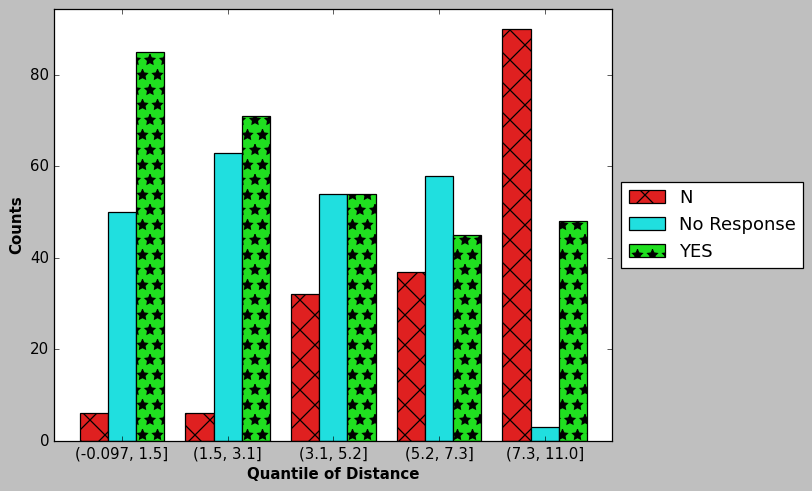

In [37]:
feature_column = 'Distance'

df = quantile_group_dataframe(coffeeData_df,feature_column,groupby_column,q,precision)

ax = plot_bars(df,palette,hatches,feature_column)

> The plot shows that the customers near US flagship store are more likely to buy the Hidden Farm coffee than those who are far from the US flagship store.

**<u> Feature: `Salary`</u>**


QuantileSalary       Decision   
(1616.9, 17925.4]    N              43
                     No Response    62
                     YES            36
(17925.4, 36374.0]   N              66
                     No Response    31
                     YES            43
(36374.0, 47599.6]   N              36
                     No Response    48
                     YES            56
(47599.6, 65917.6]   N              13
                     No Response    46
                     YES            81
(65917.6, 182058.0]  N              13
                     No Response    41
                     YES            87
Name: counts, dtype: int64




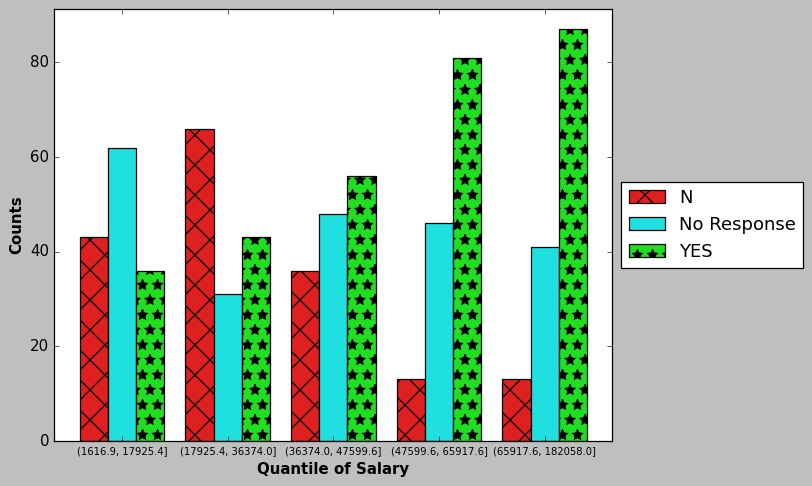

In [38]:
feature_column = 'Salary'

df = quantile_group_dataframe(coffeeData_df,feature_column,groupby_column,q,precision)

ax = plot_bars(df,palette,hatches,feature_column)

ax.tick_params(axis='x', labelsize = 8)

> We see that customers having higher salaries are more likely to buy the Hidden Farm coffee.

**<u> Feature: `spent_last_week`</u>**


Quantilespent_last_week  Decision   
(-0.1, 22.0]             N              81
                         No Response    46
                         YES            23
(22.0, 32.0]             N              50
                         No Response    46
                         YES            44
(32.0, 39.0]             N              30
                         No Response    47
                         YES            73
(39.0, 45.0]             N              10
                         No Response    44
                         YES            75
(45.0, 62.0]             N               0
                         No Response    45
                         YES            88
Name: counts, dtype: int64




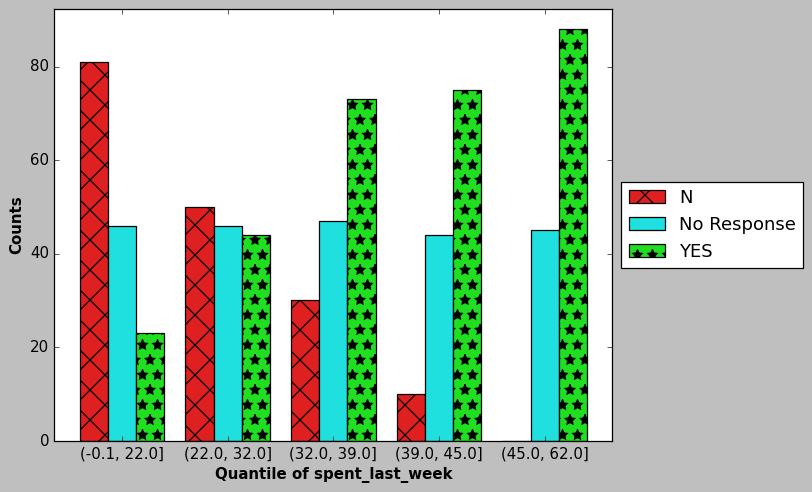

In [39]:
feature_column = 'spent_last_week'

df = quantile_group_dataframe(coffeeData_df,feature_column,groupby_column,q,precision)

ax = plot_bars(df,palette,hatches,feature_column)

> Again, we see that the customers who spent more on coffee bags last week increasingly chose to respond `YES`, while the customers who spent nothing or very less in the last week choose to respond `N`. Interestingly, the customers who chose not to respond are uniformly distributed over the range of `spent_last_week` variable.

**<u> Feature: `spent_last_month`</u>**


Quantilespent_last_month  Decision   
(-0.1, 53.0]              N              80
                          No Response    42
                          YES            20
(53.0, 96.0]              N              53
                          No Response    46
                          YES            42
(96.0, 125.6]             N              28
                          No Response    46
                          YES            64
(125.6, 159.0]            N              10
                          No Response    51
                          YES            81
(159.0, 210.0]            N               0
                          No Response    43
                          YES            96
Name: counts, dtype: int64




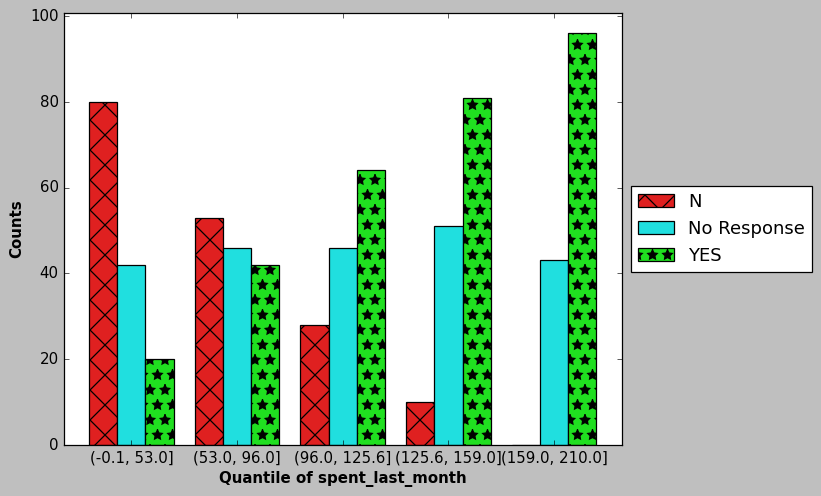

In [40]:
feature_column = 'spent_last_month'

df = quantile_group_dataframe(coffeeData_df,feature_column,groupby_column,q,precision)

ax = plot_bars(df,palette,hatches,feature_column)

ax.tick_params(axis='x', labelsize = 12)

> The pattern for `spent_last_month` here is similar to that of `spent_last_week` variable. This is consistent with our previous observation made earlier in the previous [section](#3a.-Cleaning-&-Exploring-Data).

**<u> Feature: `coffeeBags_per_year`</u>**


QuantilecoffeeBags_per_year  Decision   
(-0.1, 1.0]                  N              65
                             No Response    47
                             YES            86
(1.0, 2.0]                   N              34
                             No Response    44
                             YES            46
(2.0, 3.0]                   N              34
                             No Response    41
                             YES            55
(3.0, 4.0]                   N              20
                             No Response    45
                             YES            59
(4.0, 5.0]                   N              18
                             No Response    51
                             YES            57
Name: counts, dtype: int64




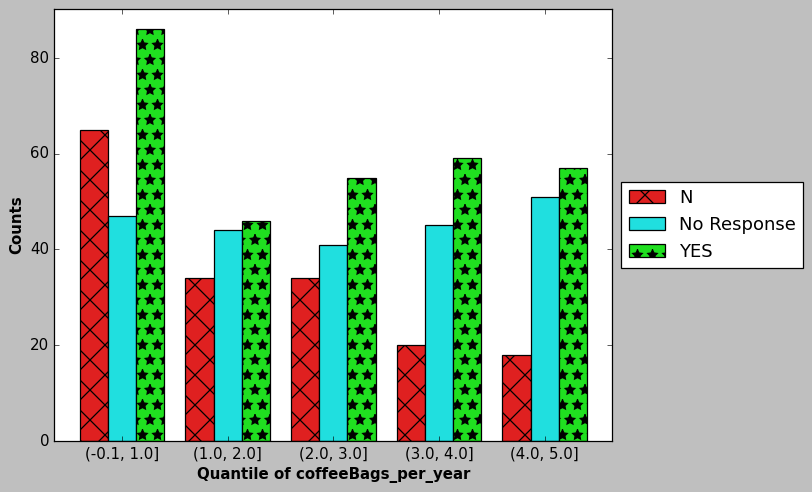

In [41]:
feature_column = 'coffeeBags_per_year'

df = quantile_group_dataframe(coffeeData_df,feature_column,groupby_column,q,precision)

ax = plot_bars(df,palette,hatches,feature_column)

> [**Revised and Detailed Observation for `coffeeBags_per_year`**]: In the previous [section](#3a.-Cleaning-&-Exploring-Data), we remarked that the customers of the `YES` group spent more than the `N` group on *average* in the last year. While this is true, we observe now that the number of customers of the `YES` group who bought about 1 cofee bag in the last year is significantly higher than the numbers of customers of the `YES` group who bought about 2 or 3 or 4 or 5 coffee beans bags in the last year. However, all the cusomers of the `YES` group together who bought 2 to 5 bags (`46 + 55 + 59 + 57 = 217` customers) are significantly more than the number of customers who purchased only 1 coffee beans bag (only `86` customers); see the dataframe`df` printed just above the quantile plot. This must be a positive thing for our Coffee Company because more customers who responded `YES` purchased mutliple coffee beans bag. We also note that as the `coffeeBags_per_year` increases, the numbers of customers of the `N` group reduces significantly. This is, however, not the case for the `YES` group and the `No Response` group. With increasing value of `coffeeBags_per_year`, the numbers of customers in both the groups do not vary too much. This is again a good thing for the Speciality Coffee company.

From the above bar plots and from the previous section, we can now confidently state that the `YES` group customers are younger, live closer (to the US flagship store) and earn more than the customers of `N` group. The `No Response` group is more similar to the `YES` group. Can we visualize this more comprehensively through plots? Yes, scatter plot will be useful here. A custom function, `plot_scatter2D()` is written next. We will pass to this function a pair of feature variables to visualize their scatter plots colored and marked by three different groups (`YES`, `No Response`, and `N` groups)

First, we will consider `Salary` and `Age`.

In [42]:
def plot_scatter2D(feature1,feature2,feature_group,data_df,color_list = ["lime", "cyan", "red"], marker_list = ['^','o', 'x'], xlabelsize = 8):
    
    groups = data_df[feature_group].unique()

    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots
    fig, axes = plt.subplots(ncols=len(groups), sharex=True, sharey=True, dpi = 110)

    i = 0
    for ax, c, marker in zip(axes, color_list, marker_list):
    
        X = data_df[data_df[feature_group] == groups[i]][[feature1, feature2]]
    
        ax.scatter(X.iloc[:,0], y = X.iloc[:,1], c=c, marker = marker, s=20, label = groups[i])
    
        # plot center
        # https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
        kmeans = KMeans(n_clusters=1)
        kmeans.fit(X)
        centers = kmeans.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5);
    
        ax.set_box_aspect(1)
        if i == 0:
            ax.set_ylabel(feature2, fontweight='bold')
    
        ax.tick_params(axis='x', labelsize=xlabelsize)
            
        ax.set_xlabel(feature1, fontweight='bold')
        ax.set_xlim([data_df[feature1].min(), data_df[feature1].max()])
        ax.set_ylim([data_df[feature2].min(), data_df[feature2].max()])
        ax.set_title('"'+groups[i]+'"')
        i += 1
    
    return axes # return axes in case you need to modify any figure properties
    
    plt.show()

In [43]:
# Common parameters: feature_group = 'Decision' and data_df = coffeeData_df
print(f"Common parameters: feature_group = 'Decision' and data_df = coffeeData_df")

Common parameters: feature_group = 'Decision' and data_df = coffeeData_df


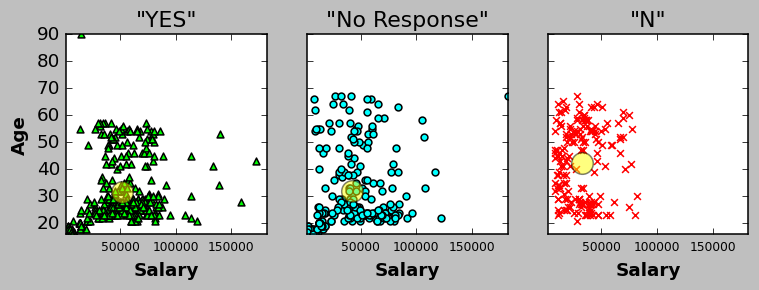

In [44]:
feature1 = 'Salary'
feature2 = 'Age'

_ = plot_scatter2D(feature1,feature2,'Decision',coffeeData_df)

> Note the cluster center of each group is marked by a bigger yellow circle. Most of the `YES` customers are relatively younger and earn more than most of the `N` customers. The pattern of `No Response` customers is more similar to the `YES` group.

How about `Salary` and `Distance`?

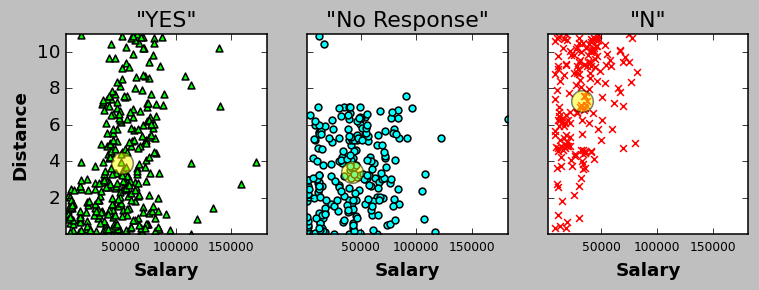

In [45]:
feature1 = 'Salary'
feature2 = 'Distance'

_ = plot_scatter2D(feature1,feature2,'Decision',coffeeData_df)

> The center of each cluster is again marked by a big yellow circle. The plots above are consistent with our previous observation: most of the `YES` customers live closer to US flagship store and also earn more than most of the `N` customers. Most of the `No Response` customers is again more similar to `YES` group.

Next, let us see similar plots for `Salary` and `spent_last_week`?

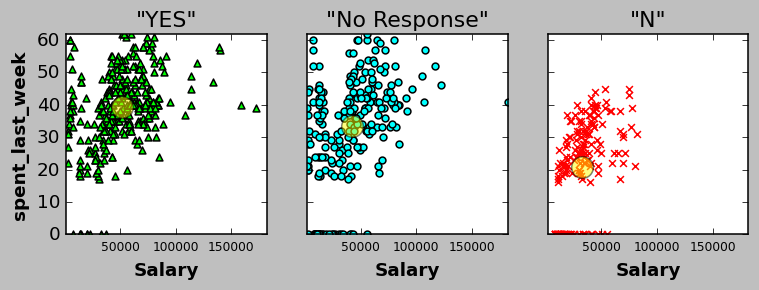

In [46]:
feature1 = 'Salary'
feature2 = 'spent_last_week'

_ = plot_scatter2D(feature1,feature2,'Decision',coffeeData_df)

> It is clear again that most of the customers of the `YES` group earns more and spent more on the speciality coffee in the last week than most of the customers of the `N` group. Pattern of the the `No Response` customers seems to be somewhere between the `YES` and `N` groups but is more similar to the `YES` group.

By now, we have acquired enough insight about the data to proceed to the next step of our work. We do not need to display any more plots for other feature variables. We will stop our data visualization phase here and move to the pre-modeling step, i.e., splitting the data into train/test sets.

But, before doing it, let us remove all the additional columns that we generated so far, i.e., `QuantileAge`, `QuantileDistance`, etc.

In [47]:
coffeeData_df.head()

,Age,Gender,coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online,Decision,QuantileAge,QuantileDistance,QuantileSalary,Quantilespent_last_week,Quantilespent_last_month,QuantilecoffeeBags_per_year
0,36,Female,0,24,73,42789,0.003168,0,YES,"(33.0, 50.0]","(-0.097, 1.5]","(36374.0, 47599.6]","(22.0, 32.0]","(53.0, 96.0]","(-0.1, 1.0]"
1,24,Male,0,44,164,74035,0.520906,0,No Response,"(23.0, 26.0]","(-0.097, 1.5]","(65917.6, 182058.0]","(39.0, 45.0]","(159.0, 210.0]","(-0.1, 1.0]"
2,24,Male,0,39,119,30563,0.916005,1,YES,"(23.0, 26.0]","(-0.097, 1.5]","(17925.4, 36374.0]","(32.0, 39.0]","(96.0, 125.6]","(-0.1, 1.0]"
3,20,Male,0,30,107,13166,0.932098,1,No Response,"(15.9, 23.0]","(-0.097, 1.5]","(1616.9, 17925.4]","(22.0, 32.0]","(96.0, 125.6]","(-0.1, 1.0]"
4,24,Female,0,20,36,14244,0.965881,0,YES,"(23.0, 26.0]","(-0.097, 1.5]","(1616.9, 17925.4]","(-0.1, 22.0]","(-0.1, 53.0]","(-0.1, 1.0]"


In [48]:
drop_list = []
for column in coffeeData_df.columns:
    if re.match(r"^[Quantile].*", column) is not None:
        drop_list.append(column)

print(drop_list)

['QuantileAge', 'QuantileDistance', 'QuantileSalary', 'Quantilespent_last_week', 'Quantilespent_last_month', 'QuantilecoffeeBags_per_year']


In [49]:
coffeeData_df.drop(drop_list, axis=1, inplace = True)
coffeeData_df.head()

,Age,Gender,coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,YES
1,24,Male,0,44,164,74035,0.520906,0,No Response
2,24,Male,0,39,119,30563,0.916005,1,YES
3,20,Male,0,30,107,13166,0.932098,1,No Response
4,24,Female,0,20,36,14244,0.965881,0,YES


## 3c. Transforming Data to Train/Test Split
To execute the train/test split properly, we need to do five things: 
1. Drop all rows with a `No Response` value in the `Decision` column, and save the result as `NOPrediction`: a dataset that will contain all known values for the decision 
2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis
3. Get the subset of `coffeeData_df` with `No Response` values in the `Decision` column, and save that subset as `Prediction`
4. Divide the `NOPrediction` subset into `X` and `y`, and then further divide those subsets into train and test subsets for `X` and `y` respectively
5. Create dummy variables to deal with categorical inputs

### (a) Drop all `No Response` values in the `Decision` column, and save the result as `NoPrediction`

In [50]:
# NoPrediction will contain all known values for the decision
# Remove the rows where Decision is equal to No Response, and store the result in a variable NOPrediction 
# Call describe() on the Decision column of NoPrediction after removing the rows with Decision column value No Response

NOPrediction = coffeeData_df[coffeeData_df.Decision != 'No Response'] # NOPrediction = coffeeData_df.dropna()
NOPrediction.describe(include='all') 

,Age,Gender,coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online,Decision
count,474.000000,474,474.000000,474.000000,474.000000,474.000000,474.000000,474.0,474
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,2.0,2
top,NaN,Female,NaN,NaN,NaN,NaN,NaN,1.0,YES
freq,NaN,241,NaN,NaN,NaN,NaN,NaN,243.0,303
mean,35.417722,NaN,2.590717,32.592827,106.727848,44731.892405,5.102898,NaN,NaN
std,13.604135,NaN,1.585211,15.758109,56.101085,25567.674430,3.354891,NaN,NaN
min,16.000000,NaN,0.000000,0.000000,0.000000,3150.000000,0.003168,NaN,NaN
25%,25.000000,NaN,1.000000,24.000000,60.000000,27284.250000,2.077965,NaN,NaN
50%,29.000000,NaN,3.000000,35.000000,113.500000,42791.500000,4.832168,NaN,NaN
75%,49.000000,NaN,4.000000,43.000000,150.000000,61621.750000,7.869086,NaN,NaN


### (b) Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis

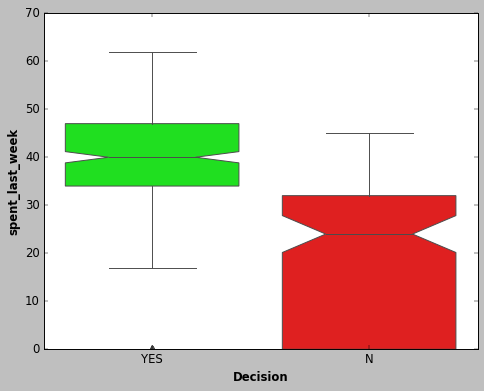

In [51]:
# Exploring our new NOPrediction dataset
# Make a boxplot on NOPrediction where the x axis is Decision, and the y axis is spent_last_week
fig, ax = plt.subplots(dpi=70)
sns.boxplot(x="Decision", y="spent_last_week", data=NOPrediction, palette = ["lime", "red"], notch = True, ax = ax)
ax.set_xlabel('Decision', fontweight='bold')
ax.set_ylabel('spent_last_week', fontweight='bold');

**What do we observe from this boxplot?**

Our observation remains same. The 75% customers of the `YES` group spent more on the speciality coffee in the last week than 75% customers of the `N` group.

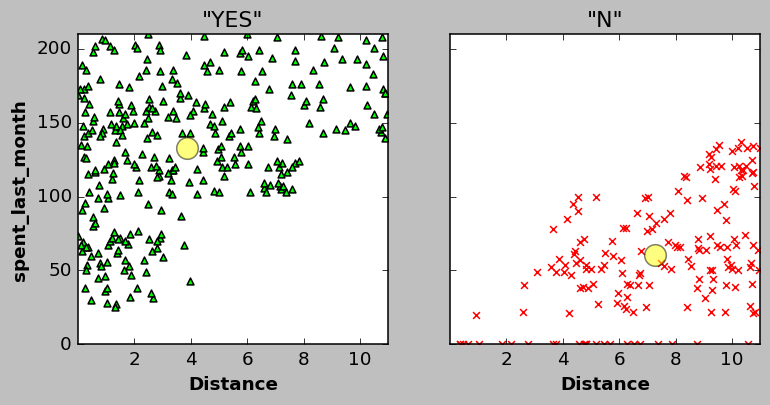

In [52]:
# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and the points are colored by Decision.
# Call plot_scatter2D() function that we wrote earlier. Use appropriate parameters.
axes = plot_scatter2D('Distance','spent_last_month','Decision', NOPrediction,color_list = ["lime", "red"], marker_list = ['^','x'])

for ax in axes:
    ax.tick_params(axis='x', labelsize=12)

**What can we conclude from this scatterplot? Remember: we are trying to build a tree to classify unseen examples.**

It is clear that there exists a very clear decision boundary (`YES` vs `N`) based on these two features (`Distance` and `spent_last_month`). The `YES` group essentially covers the left-upper region of the plot where `Distance` is less and `spent_last_month` is higher. On the contrary, the `N` group clusters distinctively around the right-lower region of the plot where `Distance` is more and `spent_last_month` is less. The yellow circles in the above plots represents the centers of the two clusters. It is clear that **these two features will be significantly important to classify the unseen examlples**.

> **Digress**: We can actually also show or draw the clear decision boundary in the space of `Distance` and `spent_last_month` if we, for instance, apply Logistic Regression model on these two features with `Decision` as the target variable. Let's do it.

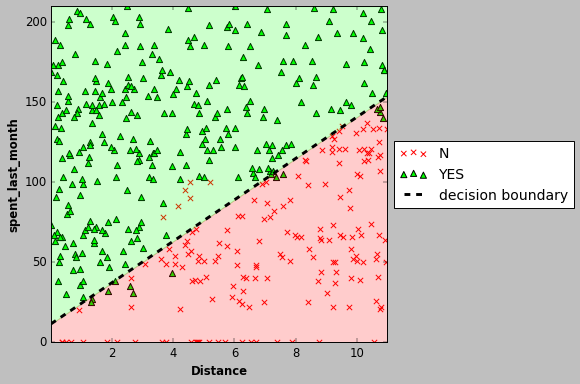

In [53]:
from sklearn.linear_model import LogisticRegression

# plt.rcParams['figure.figsize'] = (3, 3)
# plt.style.use('seaborn-white')
# plt.rcParams['figure.dpi'] = 150  


X, y = NOPrediction[['Distance', 'spent_last_month']], NOPrediction['Decision']
classifier = LogisticRegression(penalty='none')
classifier.fit(X, y)

# Retrieve the model parameters.
# Source: https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/
b = classifier.intercept_[0]
w1, w2 = classifier.coef_.T

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2


# Scatter plots of points with diff color for diff label
fig, ax = plt.subplots(dpi=70)
x_0 = X[y == 'N'][['Distance','spent_last_month']]
x_1 = X[y == 'YES'][['Distance','spent_last_month']]
plt.scatter(x_0['Distance'], x_0['spent_last_month'], marker = 'x', s=30, c='red', label='N')
plt.scatter(x_1['Distance'], x_1['spent_last_month'], marker = '^', s=40, c='lime', label='YES')

ax.set_box_aspect(1)

# plotting decision boundary
xmin, xmax = X['Distance'].min(), X['Distance'].max()
ymin, ymax = X['spent_last_month'].min(), X['spent_last_month'].max()
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=3, ls='--',label='decision boundary')
plt.fill_between(xd, yd, ymin, color='red', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='lime', alpha=0.2)
  
plt.xlabel('Distance', fontweight='bold')
plt.ylabel('spent_last_month', fontweight='bold')
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

> We can clearly see the decision boundary between the `YES` and `N` clusters; a few points, however, falling on the wrong side particularly near the decision boundary.

### (c) Get the subset of coffee data with `No Response` values in the `Decision` column, and save that subset as `Prediction`

In [54]:
# Get just those rows whose value for the Decision column is null  
Prediction = coffeeData_df[coffeeData_df.Decision == 'No Response'] # Prediction = coffeeData_df[pd.isnull(coffeeData_df["Decision"])]
Prediction.head()

,Age,Gender,coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online,Decision
1,24,Male,0,44,164,74035,0.520906,0,No Response
3,20,Male,0,30,107,13166,0.932098,1,No Response
7,24,Female,0,20,34,17425,1.193188,0,No Response
11,24,Female,0,40,153,84803,1.655096,1,No Response
12,21,Female,0,38,122,42338,1.714179,1,No Response


In [55]:
# Call describe() on Prediction
Prediction.describe(include='all')

,Age,Gender,coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online,Decision
count,228.000000,228,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,2.0,1
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,1.0,No Response
freq,NaN,125,NaN,NaN,NaN,NaN,NaN,130.0,228
mean,31.802632,NaN,2.960526,33.394737,110.407895,41923.741228,3.428836,NaN,NaN
std,14.302293,NaN,1.585514,15.697930,53.786536,27406.768360,2.153102,NaN,NaN
min,16.000000,NaN,0.000000,0.000000,0.000000,1617.000000,0.010048,NaN,NaN
25%,22.000000,NaN,2.000000,25.750000,65.000000,15911.500000,1.699408,NaN,NaN
50%,25.000000,NaN,3.000000,37.000000,113.500000,40987.500000,3.208673,NaN,NaN
75%,39.000000,NaN,4.000000,44.000000,151.250000,58537.000000,5.261184,NaN,NaN


In [56]:
# df = NOPrediction.describe().join(Prediction.describe(), lsuffix='_NoPred', rsuffix='_Pred')
# df.reindex(sorted(df.columns), axis=1)

### (d) Create dummy variables to deal with categorical inputs
One-hot encoding replaces each unique value of a given column with a new column, and puts a 1 in the new column for a given row just if its initial value for the original column matches the new column. Check out [this resource](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) if you haven't seen one-hot-encoding before. 

**Note1**: We will do this before we do our train/test split as to do it after could mean that some categories only end up in the train or test split of our data by chance and this would then lead to different shapes of data for our `X_train` and `X_test` which could/would cause downstream issues when fitting or predicting using a trained model.

**Note2**: Note how we can specify which columns we want to be transformed, so we make a list of them first. If the columns are not specified, Pandas will decide which columns are categorical based on the Pandas type, and convert those. This can be convenient but is not always what is desired. For clarity, we explicitly define them here.

In [57]:
# Check the names of the columns of NOPrediction
print(f"The 'NOPrediction' subset have {NOPrediction.shape[0]} rows and {NOPrediction.shape[1]} columns\n")
print('Column names:\n')
print('\n'.join(list(NOPrediction.columns))+'\n')

The 'NOPrediction' subset have 474 rows and 9 columns

Column names:

Age
Gender
coffeeBags_per_year
spent_last_week
spent_last_month
Salary
Distance
Online
Decision



In [58]:
# One-hot encode all the categorical features in 'NOPrediction' barring the 'Decision' column since this is
# target variable.
categorical_features = ['Gender',
                        'Online']
NOPrediction_dummies = pd.get_dummies(NOPrediction, columns = categorical_features)

print(f"The 'NOPrediction_dummies' subset have {NOPrediction_dummies.shape[0]} rows and {NOPrediction_dummies.shape[1]} columns\n")
print('Column names:\n')
print('\n'.join(list(NOPrediction_dummies.columns))+'\n')

The 'NOPrediction_dummies' subset have 474 rows and 11 columns

Column names:

Age
coffeeBags_per_year
spent_last_week
spent_last_month
Salary
Distance
Decision
Gender_Female
Gender_Male
Online_0
Online_1



### (e) Divide the `NOPrediction_dummies` subset into `X` and `y`

In [59]:
# Make an explanatory variable called X and include in it all the features except "Decision"
X = NOPrediction_dummies.drop(columns = ['Decision'])
print("X: ", type(X), X.shape)

# Make a dependent variable called y and assign to it yhe "Decision" column
y = NOPrediction_dummies['Decision']
print("y: ", type(y), y.shape)

X:  <class 'pandas.core.frame.DataFrame'> (474, 10)
y:  <class 'pandas.core.series.Series'> (474,)


In [60]:
# X.head(5).join(y.head(5).rename('y = Decision'))

In [61]:
X.head(5)

,Age,coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Gender_Female,Gender_Male,Online_0,Online_1
0,36,0,24,73,42789,0.003168,1,0,1,0
2,24,0,39,119,30563,0.916005,0,1,0,1
4,24,0,20,36,14244,0.965881,1,0,1,0
5,20,0,23,28,14293,1.036346,1,0,0,1
6,34,0,55,202,91035,1.134851,1,0,1,0


In [62]:
y.head(5)

0    YES
2    YES
4    YES
5    YES
6    YES
Name: Decision, dtype: object

### (f) Further divide those subsets into train and test subsets for `X` and `y`, respectively,: `X_train`, `X_test`, and `y_train`, `y_test`

For classification problems, it is always a good idea to know the number of samples per class, proportionally to the total number of samples. So, let us get the counts of each class in `NOPrediction_dummies`. We should try to maintain the same proportions of classes in both the train and test sets.

In [63]:
class_counts = y.value_counts()
class_counts

YES    303
N      171
Name: Decision, dtype: int64

We can easily compute the relative frequencies (percentages) to better quantify differences in the incidences of the classes:

In [64]:
class_percentages = pd.Series([(x / len(y)) * 100.00 for x in class_counts])
class_percentages.rename(index={0: 'YES', 1: 'N'})

YES    63.924051
N      36.075949
dtype: float64

For out dataset above, we see that this problem is slightly imbalanced, since the difference in the percentages is about 28%. When there is a imbalance among the classes in a binary classification problem, one usually refers to them as the *majority class* and *minority class*.

It turns out that `train_test_split()` function (re: [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) provides a way to compute splits that try to preserve (as much as it might be possible) the proportions among the classes in the entire dataset. More specifically, the `stratify` parameter takes an array-like object that describes all the classes. Thus, we can use the target as this parameter. Below we specify to stratify according to `y`, and then inspect the resulting split.

In [65]:
# Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 246
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, random_state = 246, stratify = y)
print('Training split has ', X_train.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(y_train))+ ')')
print('Test split has ', X_test.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(y_test)) + ')')

Training split has  355  rows
 and the corresponding labels have an equal number of values. (355)
Test split has  119  rows
 and the corresponding labels have an equal number of values. (119)


In [66]:
train_class_counts = y_train.value_counts()
train_class_counts

YES    227
N      128
Name: Decision, dtype: int64

In [67]:
train_class_percentages = pd.Series([(x / len(y_train)) * 100.00 for x in train_class_counts])
train_class_percentages.rename(index={0: 'YES', 1: 'N'})

YES    63.943662
N      36.056338
dtype: float64

Great!  The proportions of classes in the train split is very close to the proportions of the original dataset.

In [68]:
test_class_counts = y_test.value_counts()
test_class_counts

YES    76
N      43
Name: Decision, dtype: int64

In [69]:
test_class_percentages = pd.Series([(x / len(y_test)) * 100.00 for x in test_class_counts])
test_class_percentages.rename(index={0: 'YES', 1: 'N'})

YES    63.865546
N      36.134454
dtype: float64

Nice! The proportions of classes in the test split is also very close to the proportions of the original dataset.

# 4. Modelling
It's useful to look at the scikit-learn documentation on decision trees https://scikit-learn.org/stable/modules/tree.html before launching into applying them. If you haven't seen them before, take a look at that link, in particular the section `1.10.5.`  You can also review some basic details of Decision Tree model in this [article](https://towardsdatascience.com/decision-tree-classifier-and-cost-computation-pruning-using-python-b93a0985ea77) or this [one](https://towardsdatascience.com/almost-everything-you-need-to-know-about-decision-trees-with-code-dc026172a284).

## 4a. Model 1: Entropy model - no `max_depth`
### (a) Building the model

Before implementing the model, let's remind ourselves of what's going on theoretically with a decision tree that minimizes the Shannon entropy (yes, that's why we are referring it as "Entropy model"). Using the Shannon entropy as tree node splitting criterion is equivalent to minimizing the log loss between the true labels $y_i$  and the probalistic predictions $T_k(x_i)$ of the tree model $T$ for class $k$. See section `1.10.7.1. Classification criteria` of scikit-learn documentation on decision trees given above.

There are a few decision tree algorithms that are implemented in scikit-learn (see section `1.10.6. Tree algorithms: ID3, C4.5, C5.0 and CART`). Out of these algorithms, Ross Quinlan's **ID3 Algorithm** was one of the first, and one of the most basic, to use entropy as a metric.

**Entropy** is a measure of how uncertain we are about which category the data-points fall into at a given point in the tree. The **Information gain** of a specific feature with a threshold (such as 'spent_last_month <= 138.0') is the difference in entropy that exists before and after splitting on that feature; i.e., the information we gain about the categories of the data-points by splitting on that feature and that threshold. 

Naturally, we want to minimize entropy and maximize information gain. Quinlan's ID3 algorithm is designed to output a tree such that the features at each node, starting from the root, and going all the way down to the leaves, have maximial information gain. We want a tree whose leaves have elements that are *homogeneous*, that is, all of the same category. 

Let's start working on this first model. Once it is done, we will use almost exactly the same code for the other models.

In [70]:
# Ref: https://scikit-learn.org/stable/modules/tree.html
#      https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 1234)

# Call fit() on entr_model
entr_model.fit(X_train, y_train) 

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
# pd.Series(y_pred) 

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [71]:
print(entr_model.get_params()['max_depth'])

None


In [72]:
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.get_depth
entr_model.get_depth()

6

In [73]:
entr_model.tree_.max_depth

6

[Text(0.5, 0.9285714285714286, 'X[3] <= 138.0\nentropy = 0.943\nsamples = 355\nvalue = [128, 227]'),
 Text(0.43333333333333335, 0.7857142857142857, 'X[5] <= 3.481\nentropy = 0.986\nsamples = 225\nvalue = [128, 97]'),
 Text(0.13333333333333333, 0.6428571428571429, 'X[3] <= 24.5\nentropy = 0.562\nsamples = 76\nvalue = [10, 66]'),
 Text(0.06666666666666667, 0.5, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.2, 0.5, 'X[0] <= 50.5\nentropy = 0.191\nsamples = 68\nvalue = [2, 66]'),
 Text(0.13333333333333333, 0.35714285714285715, 'entropy = 0.0\nsamples = 59\nvalue = [0, 59]'),
 Text(0.26666666666666666, 0.35714285714285715, 'X[4] <= 31892.5\nentropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(0.2, 0.21428571428571427, 'X[7] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.13333333333333333, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.26666666666666666, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333

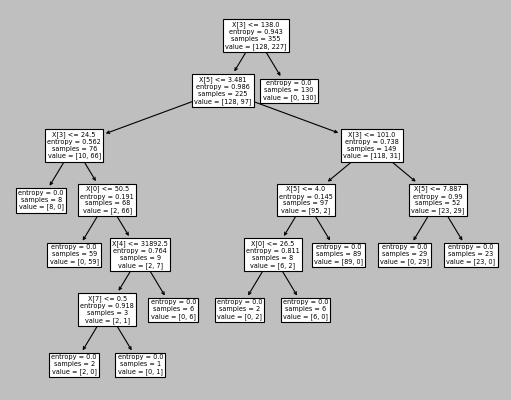

In [74]:
# Now we want to visualize the tree using 'plot_tree' function
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
tree.plot_tree(entr_model)

But, it is a kind of messy and not clear. Alternatively, we can visualize the tree with `export_graphviz` exporter (Ref: [sklearn.tree.export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)) available from the `graphviz` package which already imported earlier (`import graphviz`).

In [75]:
# class_names
entr_model.classes_

array(['N', 'YES'], dtype=object)

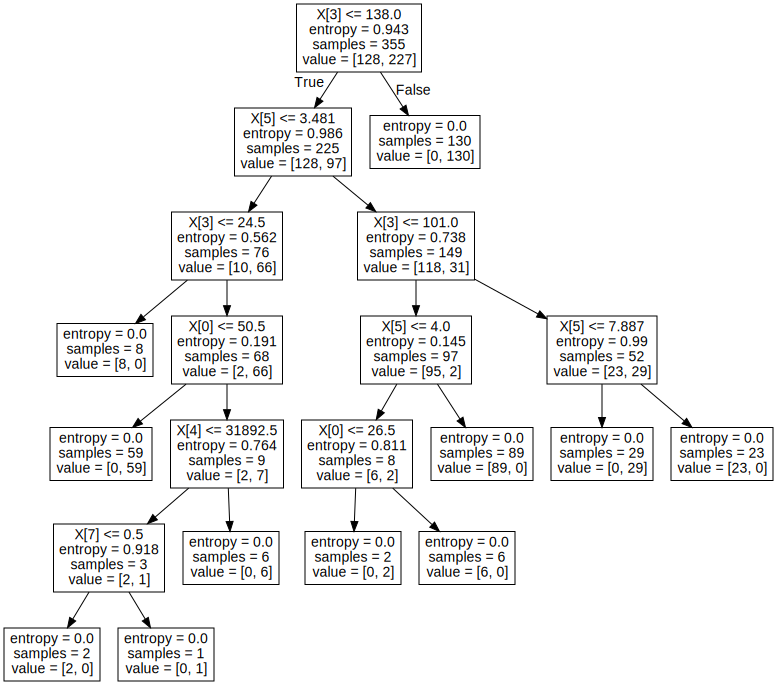

In [76]:
# Alternatively, we can do so with export_graphviz
# See Section 1.10.1. Classification (https://scikit-learn.org/stable/modules/tree.html) for further details.
#

# dot_data = StringIO()
dot_data = tree.export_graphviz(entr_model, out_file=None) 

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=list(X_train.columns), class_names = entr_model.classes_) 

graph = graphviz.Source(dot_data)  
graph 

# Another option to use: pydotplus and Image packages
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

**Alternatively** (and my favorite), the tree can also be exported in textual format with the function `export_text` (Ref: [sklearn.tree.export_text](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html)). This method doesn’t require the installation of external libraries and is more compact.

In [77]:
r = export_text(entr_model, feature_names=list(X_train.columns))
print(r)

|--- spent_last_month <= 138.00
|   |--- Distance <= 3.48
|   |   |--- spent_last_month <= 24.50
|   |   |   |--- class: N
|   |   |--- spent_last_month >  24.50
|   |   |   |--- Age <= 50.50
|   |   |   |   |--- class: YES
|   |   |   |--- Age >  50.50
|   |   |   |   |--- Salary <= 31892.50
|   |   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |   |--- class: N
|   |   |   |   |   |--- Gender_Male >  0.50
|   |   |   |   |   |   |--- class: YES
|   |   |   |   |--- Salary >  31892.50
|   |   |   |   |   |--- class: YES
|   |--- Distance >  3.48
|   |   |--- spent_last_month <= 101.00
|   |   |   |--- Distance <= 4.00
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- class: YES
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- class: N
|   |   |   |--- Distance >  4.00
|   |   |   |   |--- class: N
|   |   |--- spent_last_month >  101.00
|   |   |   |--- Distance <= 7.89
|   |   |   |   |--- class: YES
|   |   |   |--- Distance >  7.89
|   |   |   |   |---

### (b) Interpretation and evaluation

In [78]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "N"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "N"))

Model Entropy - no max depth
Accuracy: 1.0
Balanced accuracy: 1.0
Precision score for "Yes" 1.0
Precision score for "No" 1.0
Recall score for "Yes" 1.0
Recall score for "No" 1.0


The accuracy of the model is excellent. We can also display the confusion matrix (Ref: [sklearn.metrics.confusion_matrix]((https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html))) which provides much more information in an easy-to-interpret format.

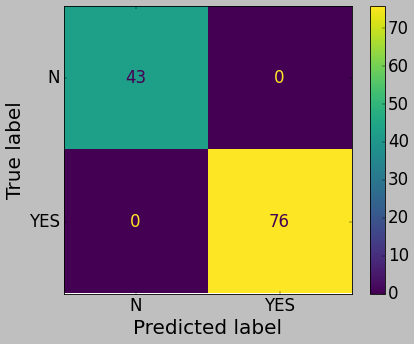

In [79]:
cm = confusion_matrix(y_test, y_pred, labels = entr_model.classes_)
_, ax = plt.subplots(dpi=60)
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = entr_model.classes_)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = entr_model.classes_, fontsize = 20)
ax.set_yticklabels(labels = entr_model.classes_, fontsize = 20)

plt.rcParams.update({'font.size': 20})

# setting label sizes after creation
ax.xaxis.label.set_size(24)
ax.yaxis.label.set_size(24)

display_cm.plot(ax = ax);

> **What can you infer from these results?** Well, this is the best prediction. Accuracy is 100% here for *this* test split.

## 4b. Model 2: Gini impurity model - no `max_depth`

Gini impurity, like entropy, is another measure of how well a given feature (and threshold) splits the data into categories. See section `1.10.7.1. Classification criteria` of scikit-learn documentation on decision trees for further details (https://scikit-learn.org/stable/modules/tree.html) or the wikipedia article (https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity).

The equations of `Shannon entropy` and `Gini impurity` are similar, but `Gini impurity` doesn't require logarithmic functions, which can be computationally expensive. 

We will be carrying out similar steps as we did for our Model 1 -- Entropy model. So, let us automate those steps by writing two custom functions, `decision_tree_model()` and `visualize_and_print()`, as below.

In [80]:
def decision_tree_model(criterion, X_train, X_test, y_train, y_test, max_depth = None, random_state = 1234):
    # Make a variable called tree_model
    tree_model = tree.DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, random_state = random_state)
    
    # Call fit()
    tree_model.fit(X_train, y_train) 

    # Call predict()
    y_pred = tree_model.predict(X_test)
    
    return tree_model, y_pred
    
def visualize_and_print(tree_model,feature_names,y_test,y_pred):
    # Use export_graphviz to visualize the tree
    dot_data = tree.export_graphviz(tree_model, out_file=None) 

    tree.export_graphviz(gini_model, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=list(X_train.columns), class_names = tree_model.classes_) 

    graph = graphviz.Source(dot_data)
    
    # Print the tree in textual format -- a compact option
    r = export_text(tree_model, feature_names=feature_names)
    print(r)
    
    
    
    # Run this block for model evaluation
    print(f"\n\nModel {tree_model.get_params()['criterion'].capitalize()}  - max_depth = {tree_model.get_params()['max_depth']}")
    print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
    print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
    for i in range(len(tree_model.classes_)):
        print(f"Precision score for '{tree_model.classes_[i]}' {metrics.precision_score(y_test,y_pred, pos_label = tree_model.classes_[i])}")

    for i in range(len(tree_model.classes_)):
        print(f"Recall score for '{tree_model.classes_[i]}' {metrics.recall_score(y_test,y_pred, pos_label = tree_model.classes_[i])}")
    
    print()

    # Now Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels = tree_model.classes_)
    _, ax = plt.subplots(dpi=60)
    display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = tree_model.classes_)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(labels = tree_model.classes_, fontsize = 20)
    ax.set_yticklabels(labels = tree_model.classes_, fontsize = 20)

    plt.rcParams.update({'font.size': 20})

    # setting label sizes after creation
    ax.xaxis.label.set_size(24)
    ax.yaxis.label.set_size(24)

    display_cm.plot(ax = ax);
    
    return graph


DecisionTreeClassifier(random_state=1234)

|--- spent_last_month <= 100.50
|   |--- Distance <= 3.04
|   |   |--- spent_last_month <= 24.50
|   |   |   |--- class: N
|   |   |--- spent_last_month >  24.50
|   |   |   |--- Age <= 59.00
|   |   |   |   |--- class: YES
|   |   |   |--- Age >  59.00
|   |   |   |   |--- class: N
|   |--- Distance >  3.04
|   |   |--- Distance <= 4.00
|   |   |   |--- Age <= 26.50
|   |   |   |   |--- class: YES
|   |   |   |--- Age >  26.50
|   |   |   |   |--- class: N
|   |   |--- Distance >  4.00
|   |   |   |--- class: N
|--- spent_last_month >  100.50
|   |--- Distance <= 8.05
|   |   |--- class: YES
|   |--- Distance >  8.05
|   |   |--- spent_last_month <= 140.00
|   |   |   |--- class: N
|   |   |--- spent_last_month >  140.00
|   |   |   |--- class: YES



Model Gini  - max_depth = None
Accuracy: 0.9915966386554622
Balanced accuracy: 0.993421052631579
Precision score for 'N' 0.9772727272727273
Precision score for 'YES' 1.0
Recall score for 'N' 1.

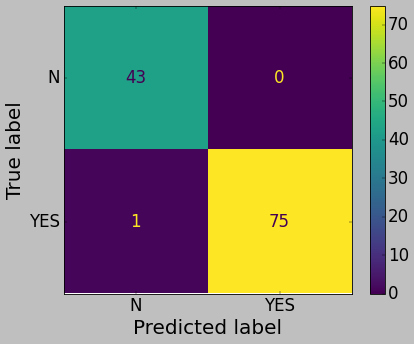

In [81]:
# Create the model and predict
gini_model, y_pred = decision_tree_model("gini", X_train, X_test, y_train, y_test)

# Check out model
print(f"\n{gini_model}\n")


# Plot, print, and visualize the results
graph = visualize_and_print(gini_model,list(X_train.columns),y_test,y_pred)

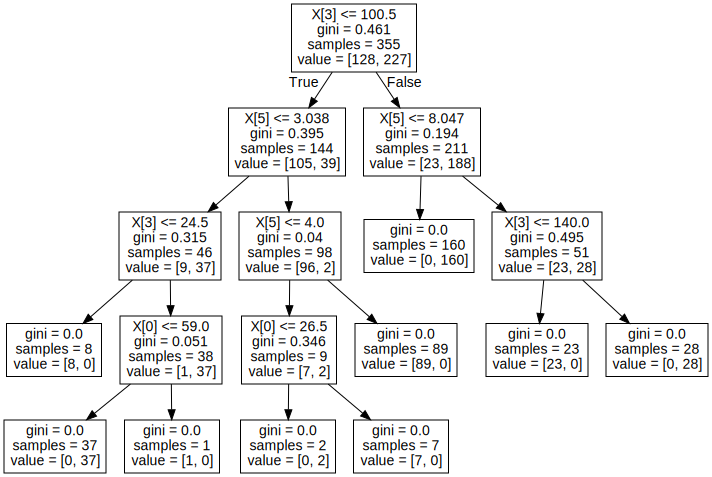

In [82]:
graph

In [83]:
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.get_depth
gini_model.get_depth()

4

> **Note** that the depth of this Gini impurity model is 4, while the depth of the Entropy model is 6. Thus, this Gini model is computationally cheaper than the Entropy model.

> **How do the results here compare to the previous entropy model?** Here, we have one false prediction of `YES` customer for *this* particular test split. But, we cannot really decisively say that the entropy model was better because it can be simply by random chance for *this* particular test split. Beside, the Entropy model's depth is 6 but this Gini model has a depth of 4, implying that Gini model is less likely to overfit, and thus, may perform better on other unseen data.

## 4c. Model 3: Entropy model - `max_depth = 3`

We're now going to try to limit the depth of our decision tree. We will start with the entropy model.  
As you know, we need to strike a balance with tree depth.

Insufficiently deep, and we're not giving the tree the opportunity to spot the right patterns in the training data. 

Excessively deep, and we're probably going to make a tree that overfits to the training data, at the cost of very high error on the (hitherto unseen) test data. 

Sophisticated data scientists use methods like random search with cross-validation to systematically find a good depth for their tree. We'll start with picking 3, and see how that goes. 


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)

|--- spent_last_month <= 138.00
|   |--- Distance <= 3.48
|   |   |--- spent_last_month <= 24.50
|   |   |   |--- class: N
|   |   |--- spent_last_month >  24.50
|   |   |   |--- class: YES
|   |--- Distance >  3.48
|   |   |--- spent_last_month <= 101.00
|   |   |   |--- class: N
|   |   |--- spent_last_month >  101.00
|   |   |   |--- class: YES
|--- spent_last_month >  138.00
|   |--- class: YES



Model Entropy  - max_depth = 3
Accuracy: 0.9159663865546218
Balanced accuracy: 0.8887698898408812
Precision score for 'N' 0.9714285714285714
Precision score for 'YES' 0.8928571428571429
Recall score for 'N' 0.7906976744186046
Recall score for 'YES' 0.9868421052631579



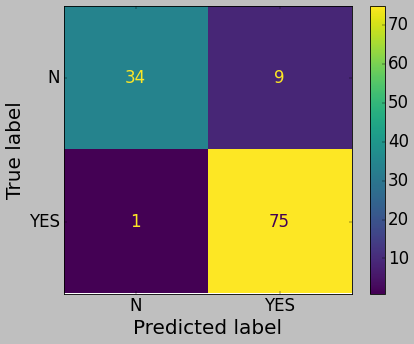

In [84]:
# Create the model and predict
entr_model2, y_pred = decision_tree_model("entropy", X_train, X_test, y_train, y_test, max_depth = 3)

# Check out model
print(f"\n{entr_model2}\n")


# Plot, print, and visualize the results
_ = visualize_and_print(entr_model2,list(X_train.columns),y_test,y_pred)

In [85]:
entr_model2.get_depth()

3

> So, our accuracy decreased, but **is this certainly an inferior tree to the max depth original tree we did with Model 1?**   Note that the number of samples required to populate the tree doubles for each additional level the tree grows to. The parameter `max_depth` is used to control the size of the tree to prevent overfitting. Model 1 based on Entropy criterion has maximum possible depth and is likely to be an overfit model. This means that Model 1 *may* perform poorly on another set of unseen data relative to this Model 3.

## 4d. Model 4: Gini impurity model - `max_depth = 3`
We're now going to try the same with the Gini impurity model. 


DecisionTreeClassifier(max_depth=3, random_state=1234)

|--- spent_last_month <= 138.00
|   |--- Distance <= 3.48
|   |   |--- spent_last_month <= 24.50
|   |   |   |--- class: N
|   |   |--- spent_last_month >  24.50
|   |   |   |--- class: YES
|   |--- Distance >  3.48
|   |   |--- spent_last_month <= 101.00
|   |   |   |--- class: N
|   |   |--- spent_last_month >  101.00
|   |   |   |--- class: YES
|--- spent_last_month >  138.00
|   |--- class: YES



Model Entropy  - max_depth = 3
Accuracy: 0.9831932773109243
Balanced accuracy: 0.986842105263158
Precision score for 'N' 0.9555555555555556
Precision score for 'YES' 1.0
Recall score for 'N' 1.0
Recall score for 'YES' 0.9736842105263158



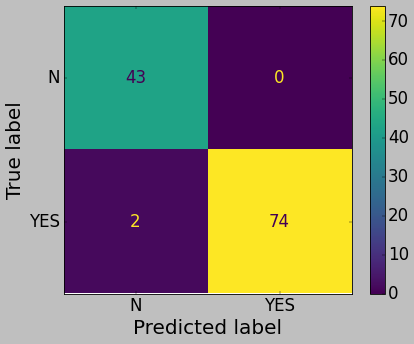

In [86]:
# Create the model and predict
gini_model2, y_pred = decision_tree_model("gini", X_train, X_test, y_train, y_test, max_depth = 3)

# Check out model
print(f"\n{gini_model2}\n")


# Plot, print, and visualize the results
_ = visualize_and_print(entr_model2,list(X_train.columns),y_test,y_pred)

In [87]:
gini_model2.get_depth()

3

**Now this is an elegant tree**. Its accuracy is not the highest, but it's still the best model we've produced so far because its predictive power at least for *this* test split is way better than the the Entropy model in Model 3 which has the same depth (= 3) as this Model 4. Additionally, the test accuracy of this Model 4 is almost same as the Model 1 and Model 2 both of which have more `depth` than this model. 

# 5. Evaluation and Conclusion
## 5a. How many customers will buy Hidden Farm coffee? 
Let's first ascertain how many loyal customers claimed, in the survey, that they will purchase the Hidden Farm coffee. 

In [88]:
# Call value_counts() on the 'Decision' column of the original coffeeData_df
coffeeData_df["Decision"].value_counts()

YES            303
No Response    228
N              171
Name: Decision, dtype: int64

Let's now determine the number of people that, according to the model, will be willing to buy the Hidden Farm coffee.
1. First, one-hot encode all the categorical features (except 'Decision') in `Prediction` dataset and call it `Prediction_dummies`
2. Next, we subset the `Prediction_dummies` dataset into `new_X` considering all the variables except `Decision` 
3. Use that dataset to predict a new variable called `potential_buyers`

In [89]:
# One-hot encode all the categorical features in 'Prediction' barring the 'Decision' column since this is
# target variable.
categorical_features = ['Gender',
                        'Online']
Prediction_dummies = pd.get_dummies(Prediction, columns = categorical_features)

print(f"The 'Prediction_dummies' subset have {Prediction_dummies.shape[0]} rows and {Prediction_dummies.shape[1]} columns\n")
print('Column names:\n')
print('\n'.join(list(Prediction_dummies.columns))+'\n')

The 'Prediction_dummies' subset have 228 rows and 11 columns

Column names:

Age
coffeeBags_per_year
spent_last_week
spent_last_month
Salary
Distance
Decision
Gender_Female
Gender_Male
Online_0
Online_1



In [90]:
# Feature selection
# Make a variable called new_X, and assign it the subset of Prediction_dummies, containing all the feature_cols except "Decision"
new_X = Prediction_dummies.drop(columns = ['Decision'])
print("new_X: ", type(new_X), new_X.shape)

new_X:  <class 'pandas.core.frame.DataFrame'> (228, 10)


In [91]:
# Make a variable called potential_buyers, and assign it the result of calling predict() on a model of your choice; 
# don't forget to pass new_X to predict()
potential_buyers = gini_model2.predict(new_X)

In [92]:
# Let's get the numbers of YES's and NO's in the potential buyers 
# Call unique() on np, and pass potential_buyers and return_counts=True 
unique_values,unique_counts = np.unique(potential_buyers,return_counts=True)
unique_counts[unique_values == 'YES'][0]

177

In [93]:
potential_YES = (coffeeData_df["Decision"].value_counts().YES) + (unique_counts[unique_values == 'YES'][0])
potential_YES

480

Thus, the total number of potential buyers is `303 + 177 = 480`.

In [94]:
# Print the total number of surveyed people 
print(f"Total number of surveyed people: {coffeeData_df.shape[0]}")

Total number of surveyed people: 702


In [95]:
# Let's calculate the proportion of buyers and print it
# ProportionBuyers = (potential_YES/coffeeData_df.shape[0])*100
ProportionBuyers = round((potential_YES/coffeeData_df.shape[0])*100, 2)
print(f"Percentage of possible buyers: {ProportionBuyers} %")

Percentage of possible buyers: 68.38 %


> Now note that we trained our model using 75% of our data from `NOPrediction_dummies`, while 25% of it was used to evaluate the model. Then, we used this trained model to predict for all the data from `Prediction_dummies`. Now that we know that our Model 3 is the best one, we can train this model using 100% of data from `NOPrediction_dummies` and then use this updated model to predict for `Prediction_dummies` dataset. This might change result slightly. Let's see.

In [96]:
# Create model
gini_model3 = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 1234)
    
# Call fit()
X = NOPrediction_dummies.drop(columns = ['Decision'])
y = NOPrediction_dummies['Decision']
gini_model3.fit(X, y) 

# Call predict()
potential_buyers = gini_model3.predict(new_X)

# Compute potential buyers
unique_values,unique_counts = np.unique(potential_buyers,return_counts=True)
print(unique_counts[unique_values == 'YES'][0])

potential_YES = (coffeeData_df["Decision"].value_counts().YES) + (unique_counts[unique_values == 'YES'][0])
# ProportionBuyers = (potential_YES/coffeeData_df.shape[0])*100
ProportionBuyers = round((potential_YES/coffeeData_df.shape[0])*100, 2)
print(f"Percentage of possible buyers: {ProportionBuyers} %")

177
Percentage of possible buyers: 68.38 %


Ok, no improvement. We have the exact same result.

## 5b. Decision
Recall that we proposed at the following at the beginning: if more than 70% of the surveyed customers are likely to buy the Hidden Farm coffee, then we could recommend to our client to strike the deal with the Chinese Hidden Farm farmers and sell the coffee. Otherwise, our client won't strike the deal. Well now's crunch time. Are we going to go ahead with that idea? If so, we won't be striking the deal with the Chinese farmers. 

Well, we have **Decision Tree** model. So where's the decision? What should we do now? (Cue existential cat emoji). 

Ultimately, though, we can't write an algorithm to actually *make the business decision* for us. This is because such decisions depend on our values, what risks we are willing to take, the stakes of our decisions, and how important it is for us to *know* that we will succeed. What are we going to do with the models we've made? Are we going to risk everything, strike the deal with the *Hidden Farm* farmers, and sell the coffee? 

The dilemma here is that we have a model that does not provide us any further evidence to rule out all the doubts that we have now. When the stakes are higher, our evidence has to rule out more doubts but it becomes harder for us to know things and get evidence. We can end up paralyzed in predicaments; sometimes, we can act to better our situation only if we already know certain things, which we can only if our stakes were lower and we'd *already* bettered our situation. 

Data science and machine learning can't solve such problems. But what it can do is help us make great use of our data to help *inform* our decisions.

## 6. Random Forest
You know that if we do not assign `random_state`, then each time we run a given decision tree algorithm to make a prediction (such as whether customers will buy the Hidden Farm coffee) we will actually get a slightly different result. The reason is that the machine learning algorithms are by definition ***stochastic***, in that their output is at least partly determined by randomness. 

To account for this variability and ensure that we get the most accurate prediction, we might want to actually make lots of decision trees, and get a value that captures the centre or average of the outputs of those trees. And, therefore, we can implement ***Random Forest*** to achieve it. 

Essentially, Random Forest involves making lots of trees with similar properties, and then performing summary statistics on the outputs of those trees to reach that central value. Random forests are hugely powerful classifers, and they can improve predictive accuracy and control over-fitting. 

Why not try to inform our decision with random forest? Let's do it. We'll need to make use of the RandomForestClassifier function within the sklearn.ensemble module, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

### 6a. Import additional modules

In [97]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification

### 6b. Building Model
We'll use our `X_train` and `y_train` variables (or, `X` and `y`, if we prefer that way) just as before.

We'll first need to create our new Random Forest model by calling `RandomForestClassifier()` classifier (re: [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) and will call it `firstRFModel`.

Then, just as before, we'll call `.fit()` on `firstRFModel` variable, and plug in `X_train` and `y_train`.

Finally, we would make a variable called `potential_buyers`, and assign it the result of calling the `.predict()` method on our new `firstRFModel`, with the `X_test` data and then `new_X` data passed to it. 

In [98]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(max_depth = 3, random_state= 1234)

# Model and fit
# firstRFModel.fit(X, y)
firstRFModel.fit(X_train, y_train)
potential_buyers = firstRFModel.predict(new_X)

# Compute potential buyers
unique_values,unique_counts = np.unique(potential_buyers,return_counts=True)
print(unique_counts[unique_values == 'YES'][0])

potential_YES = (coffeeData_df["Decision"].value_counts().YES) + (unique_counts[unique_values == 'YES'][0])
ProportionBuyers = round((potential_YES/coffeeData_df.shape[0])*100, 2)
print(f"[Random Forest (X_train, y_train)]: Percentage of possible buyers:  {ProportionBuyers} %")


179
[Random Forest (X_train, y_train)]: Percentage of possible buyers:  68.66 %


### 6c. Revised Conclusion

> **Has our conclusion changed? Or is the result of executing random forest the same as our best model reached by a single decision tree?** 

> The percentage of possible buyers of the special Chinesse coffee increased marginally from 68.37% (Gini based Decision Tree model) to 68.66% in the Random Forest Classifier model (Gini based criterion). In both the cases, we have considered `max_depth = 3`. If we train the Random Forest classifier with 100% of data from `NOPrediction_dummies` (i.e., with `X` and `y`), then the percentage of possible buyers improves to 69.8% (verify it by modifying and re-running the above code block approprriately). This value is still less than 70%. 

> Another point worth mentioning is that it might be possible to cross the threshold of 70% for another test/train split. But, this will not guarantee that this will happen in reality. In fact, the actual percentage of possible buyers (if our client goes ahead and strike the deal with the Hidden Farm farmers) may still cross the 70% threshold even though we obtained percentage of possible buyers as 68.66%.

> Finally, we should further note that the above estimate of percentage of possible buyers (68.66%) is only based on 702 customers who were surveyed. This is only a subset of all the customers of our client (the Speciality Coffee company). If a different set of customers would have been surveyed, then the above estimate would have been different. 

To reduce such variability, it is typically recommended to use cross-validation method that combines (averages) measures of fitness in prediction to derive a more accurate estimate of model prediction performance.